# Multiscale views of an Alfvenic slow solar wind: 3D velocity distribution functions observed by the Proton-Alpha Sensor of Solar Orbiter
## Louarn et al., 2021 https://doi.org/10.1051/0004-6361/202141095


In [1]:
import speasy as spz
import matplotlib
import matplotlib.pyplot as plt
import  speasy as spz
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

#%matplotlib inline
#%config InlineBackend.figure_formats = ['svg']

Define the observation dates

In [2]:
start = "2020-07-14T10:00:00"
stop  = "2020-07-15T06:00:00"

## Magnetic field data
Magnetic field measurements are stored under the `amda/solo_b_rtn_hr` parameter. We save the `SpeasyVariable` object as `b_rtn_hr` for later use.

In [3]:
b_rtn_hr = spz.get_data("amda/solo_b_rtn_hr", start, stop)

We can easily check the data by using the `SpeasyVariable.plot` method.

<AxesSubplot:ylabel='b_rtn nT'>

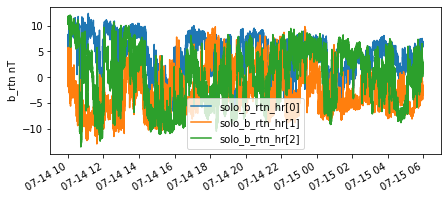

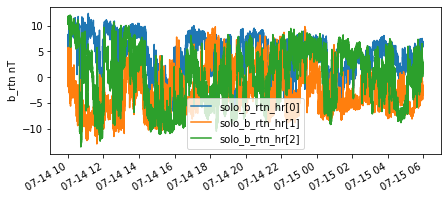

In [4]:
b_rtn_hr.plot(figsize=(7,3), ylabel="b_rtn "+b_rtn_hr.meta["PARAMETER_UNITS"])
# equivalent to 
b_rtn_hr.to_dataframe(datetime_index=True).plot(figsize=(7,3), ylabel="b_rtn "+b_rtn_hr.meta["PARAMETER_UNITS"])

Transform the variable to a `pandas.DataFrame` object using the `to_dataframe` method. `to_dataframe` accepts a `datetime_index` argument (default:`False`) indicating if time values should be converted to `datetime` objects.

Let's store the magnetic field in a dataframe called `b_rtn_df`.

In [5]:
b_rtn_df = b_rtn_hr.to_dataframe(datetime_index=True)
b_rtn_df.describe()

,solo_b_rtn_hr[0],solo_b_rtn_hr[1],solo_b_rtn_hr[2]
count,576009.000000,576009.000000,576009.00000
mean,4.436778,-3.022162,0.31365
std,3.676364,4.013111,5.41409
min,-7.779760,-12.940800,-13.52930
25%,1.998190,-5.914900,-4.33148
50%,4.978280,-3.851050,1.15283
75%,7.296500,-0.396841,4.84777
max,12.380900,9.837870,12.08040


The `meta` attribute contains some useful information, for example we can get the names of the components and units.

In [6]:
print(b_rtn_hr.meta["PARAMETER_COMPONENTS"])
print(b_rtn_hr.meta["PARAMETER_UNITS"])

br,bt,bn
nT


For convenience we can rename the columns of the dataframe. The `PARAMETER_COMPONENTS` key is not present for scalar time-series, you can use `PARAMETER_NAME` or `PARAMETER_SHORT_NAME` instead.

In [7]:
def rename_columns(df, param):
    if not "PARAMETER_COMPONENTS" in param.meta:
        component_map = {df.columns[0]:param.meta["PARAMETER_SHORT_NAME"]}
    else:
        component_names = param.meta["PARAMETER_COMPONENTS"].split(",")
        component_map = {n1:n2 for n1,n2 in zip(df.columns, component_names)}
    df = df.rename(columns = component_map)
    return df

b_rtn_df = rename_columns(b_rtn_df, b_rtn_hr)
b_rtn_df.describe()

,br,bt,bn
count,576009.000000,576009.000000,576009.00000
mean,4.436778,-3.022162,0.31365
std,3.676364,4.013111,5.41409
min,-7.779760,-12.940800,-13.52930
25%,1.998190,-5.914900,-4.33148
50%,4.978280,-3.851050,1.15283
75%,7.296500,-0.396841,4.84777
max,12.380900,9.837870,12.08040


And make the figure a bit more pleasant.

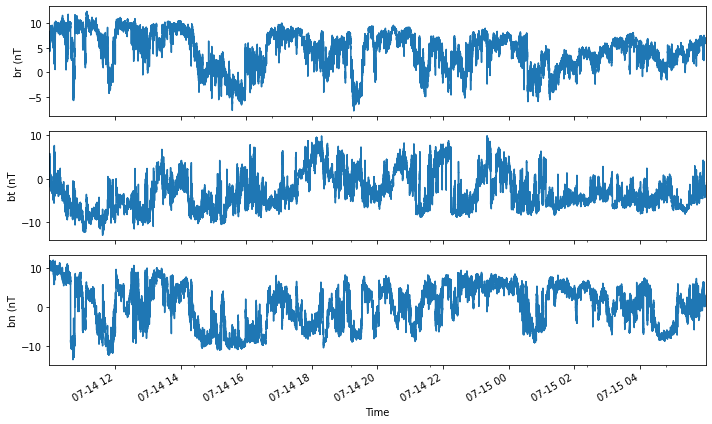

In [8]:
titles = b_rtn_hr.meta["PARAMETER_COMPONENTS"].split(",")
units = b_rtn_hr.meta["PARAMETER_UNITS"]
fig, ax = plt.subplots(3,1,figsize=(10,6), sharex=True)
for i,name in enumerate(b_rtn_df.columns):
    b_rtn_df[name].plot(ax=ax[i])
    ax[i].set_ylabel(f"{titles[i]} ({units}")
plt.xlim([b_rtn_df.index[0],b_rtn_df.index[-1]])
ax[2].set_xlabel("Time")
plt.tight_layout()

## Velocity data

PAS proton velocity data is available on AMDA and its identifier is `pas_momgr1_v_rtn`. We set the data aside under the `v_rtn` variable.

In [9]:
v_rtn = spz.get_data("amda/pas_momgr1_v_rtn", start, stop)

Create a dataframe object.

In [10]:
v_rtn_df = rename_columns(v_rtn.to_dataframe(datetime_index=True),
                          v_rtn)


v_rtn_df.describe()

,vr,vt,vn
count,27514.000000,27514.000000,27514.000000
mean,426.249599,-6.334826,0.317864
std,17.954961,15.367386,20.181820
min,384.967000,-59.670600,-43.584300
25%,412.822500,-16.342600,-16.186175
50%,424.106500,-3.483475,-2.348700
75%,438.325250,4.522003,16.442050
max,488.915000,29.120100,58.001800


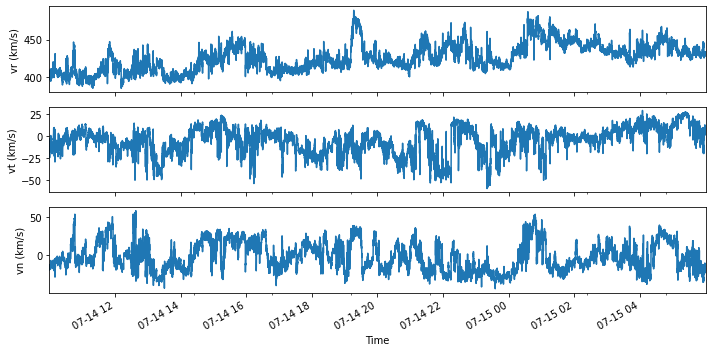

In [11]:
titles = v_rtn.meta["PARAMETER_COMPONENTS"].split(",")
units = v_rtn.meta["PARAMETER_UNITS"]
fig, ax = plt.subplots(3,1,figsize=(10,5), sharex=True)
for i,name in enumerate(v_rtn_df.columns):
    v_rtn_df[name].plot(ax=ax[i])
    ax[i].set_ylabel(f"{titles[i]} ({units})")
plt.xlim([v_rtn_df.index[0],v_rtn_df.index[-1]])
plt.xlabel("Time")
plt.tight_layout()

## Density

PAS proton density is identified by `pas_momgr_n`.

In [12]:
sw_n = spz.get_data("amda/pas_momgr_n", start, stop)
sw_n_df = rename_columns(sw_n.to_dataframe(datetime_index=True),sw_n)
sw_n_df.describe()

,density
count,27514.000000
mean,16.025642
std,2.405489
min,5.053780
25%,14.319725
50%,15.890950
75%,17.525500
max,30.859600


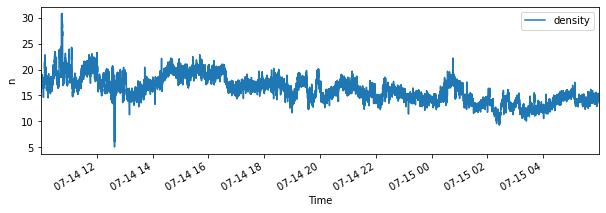

In [13]:
sw_n_df.plot(figsize=(10,3))
plt.xlim([sw_n_df.index[0], sw_n_df.index[-1]])
plt.ylabel("n")
plt.xlabel("Time")
plt.show()

## Proton temperature

Proton temperature is identified by `pas_momgr_tav`.

In [14]:
tav = spz.get_data("amda/pas_momgr_tav", start, stop)
tav_df = rename_columns(tav.to_dataframe(datetime_index=True), tav)
tav_df.describe()

,t_av
count,27514.000000
mean,12.799194
std,2.060786
min,8.017990
25%,11.346600
50%,12.981350
75%,14.296200
max,52.293900


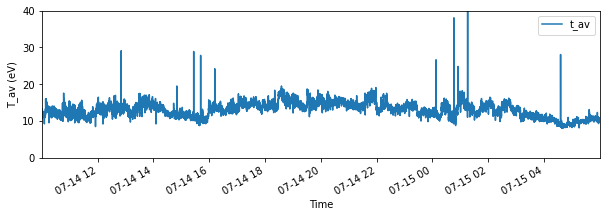

In [15]:
tav_df.plot(figsize=(10,3))
plt.xlabel("Time")
plt.ylabel("T_av (eV)")
plt.xlim([tav_df.index[0], tav_df.index[-1]])
plt.ylim([0,40])
plt.show()

## Proton differential energy flux

Proton differential energy flux is `pas_l2_omni`. We define a function `spectro_plot` for retrieving and plotting the energy data. `spectro_plot` requires three mandatory arguments : 
- `param_id` : the identifier of the parameter we want to download
- `start` : start time
- `stop` : stop time

In [16]:
def spectro_plot(param_id, start, stop, xlabel=None, ylabel=None, 
                 zlabel=None, yscale=None,
                 channels = None, ax=None, figsize=(10,2), 
                 vmin=None, vmax=None, lognorm=True, datefmt="%H:%M",
                 cmap=None):
    import matplotlib
    import matplotlib.colors as colors
    import matplotlib.ticker as mticker
    from datetime import datetime
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=figsize)
    # get the data
    param_data = spz.get_data(param_id, start, stop)
    [n,m] = param_data.data.shape
    X = param_data.data 
    
    # channels (constant channels case)
    if channels is None:
        y = np.arange(0,m,1)
    else:
        y = channels
    
    # grid
    x1, y1 = np.meshgrid(param_data.time,y, indexing="ij")
    
    # data bounds
    if vmin is None:
        vmin = np.nanmin(X)
    if vmax is None:
        vmax = np.nanmax(X)
    
    # colormap
    if not cmap:
        cmap = matplotlib.cm.rainbow.copy()
        cmap.set_bad('White',0.)
    
    # normalize colormapping
    if lognorm and vmin>0.:
        norm=colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm=None
    
    
    c = ax.pcolormesh(x1, y1, X, cmap=cmap, norm=norm, edgecolors="face")
    cbar = plt.colorbar(c,ax=ax, norm=norm)
    if zlabel:
        cbar.set_label(zlabel)
    
    if xlabel:
        ax.set_xlabel(xlabel)
    x_ticks = ax.get_xticks()
    x_ticks = [datetime.utcfromtimestamp(xi) for xi in x_ticks]
    x_labels = [d.strftime(datefmt) for d in x_ticks]
    
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(x_labels)
    
    if ylabel:
        ax.set_ylabel(ylabel)
    
    ax.set_ylim(y.min(), y.max())
    
    if yscale:
        ax.set_yscale(yscale)
    
    return ax, param_data
    

Energy tables are not (yet) retrieved automatically and need be hard-coded like below

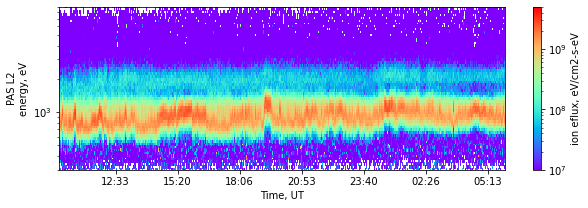

In [17]:
ybin_min = np.array([17916.95, 16895.68, 15932.63, 15024.47, 14168.07, 13360.49, 12598.94, 
    11880.81, 11203.6, 10565, 9962.79, 9394.91, 8859.4, 8354.42, 7878.21, 
    7429.16, 7005.69, 6606.37, 6229.81, 5874.71, 5539.85, 5224.08, 4926.31, 
    4645.51, 4380.71, 4131.01, 3895.55, 3673.5, 3464.11, 3266.66, 3080.46, 
    2904.87, 2739.29, 2583.15, 2435.91, 2297.07, 2166.13, 2042.66, 1926.23, 
    1816.44, 1712.9, 1615.26, 1523.19, 1436.37, 1354.5, 1277.29, 1204.49, 
    1135.83, 1071.09, 1010.04, 952.47, 898.17, 846.98, 798.7, 753.17, 710.24, 
    669.76, 631.58, 595.58, 561.64, 529.62, 499.43, 470.97, 444.12, 418.81, 
    394.93, 372.42, 351.19, 331.18, 312.3, 294.5, 277.71, 261.88, 246.96, 
    232.88, 219.6, 207.09, 195.28, 184.15, 173.66, 163.76, 154.42, 145.62, 
    137.32, 129.49, 122.11, 115.15, 108.59, 102.4, 96.56, 91.06, 85.87, 
    80.97, 76.36, 72.01, 67.9])
ybin_max = np.array([18999.94, 17916.95, 16895.68, 15932.63, 15024.47, 14168.07, 13360.49, 
    12598.95, 11880.81, 11203.6, 10565, 9962.79, 9394.91, 8859.4, 8354.42, 
    7878.21, 7429.16, 7005.7, 6606.37, 6229.81, 5874.71, 5539.85, 5224.08, 
    4926.31, 4645.51, 4380.71, 4131.01, 3895.55, 3673.5, 3464.11, 3266.66, 
    3080.46, 2904.87, 2739.29, 2583.15, 2435.91, 2297.07, 2166.13, 2042.66, 
    1926.23, 1816.44, 1712.9, 1615.26, 1523.19, 1436.37, 1354.5, 1277.29, 
    1204.49, 1135.83, 1071.09, 1010.04, 952.47, 898.17, 846.98, 798.7, 
    753.17, 710.24, 669.76, 631.58, 595.58, 561.64, 529.62, 499.43, 470.97, 
    444.12, 418.81, 394.93, 372.42, 351.19, 331.18, 312.3, 294.5, 277.71, 
    261.88, 246.96, 232.88, 219.6, 207.09, 195.28, 184.15, 173.66, 163.76, 
    154.42, 145.62, 137.32, 129.49, 122.11, 115.15, 108.59, 102.4, 96.56, 
    91.06, 85.87, 80.97, 76.36, 72.01])
ybins = np.vstack((ybin_min, ybin_max)).T
channels = np.mean(ybins, axis=1)

ax, pas_omni = spectro_plot("amda/pas_l2_omni", start, stop, 
                  channels=channels, 
                  xlabel="Time, UT",
                  ylabel="PAS L2\nenergy, eV", 
                  zlabel="ion eflux, eV/cm2-s-eV",
                  yscale="log",
                  figsize=(10,3),
                  vmin=1e7, vmax=5e9,
                  lognorm=True,
                 )
plt.ylim([3e2,9e3])
plt.show()

## Correlation of velocity and magnetic field fluctuations

Study of the correlation between `v_rtn` and `b_rtn`. 

We will need to perform operations on data that are not regularly sampled as represented on the figure below.

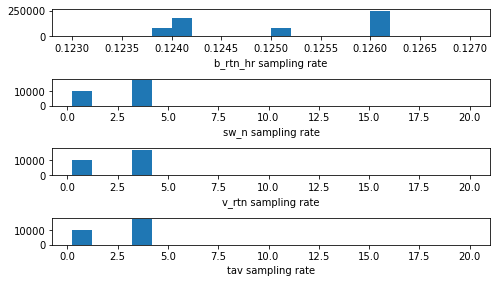

In [18]:
fig, ax = plt.subplots(4,1,figsize=(7,4))
ax[0].hist(np.diff(b_rtn_hr.time), bins=20)
ax[0].set_xlabel("b_rtn_hr sampling rate")
ax[1].hist(np.diff(sw_n.time), bins=20)
ax[1].set_xlabel("sw_n sampling rate")
ax[2].hist(np.diff(v_rtn.time), bins=20)
ax[2].set_xlabel("v_rtn sampling rate")
ax[3].hist(np.diff(tav.time), bins=20)
ax[3].set_xlabel("tav sampling rate")
plt.tight_layout()

Resample the data every second. Create a new dataframe object `df_1s` which will contain all the data.

In [19]:
b_rtn_1s = b_rtn_df.resample("1S").ffill()
sw_n_1s = sw_n_df.resample("1S").ffill()
v_rtn_1s = v_rtn_df.resample("1S").ffill()

df_1s = b_rtn_1s.merge(sw_n_1s, left_index=True, right_index=True)
df_1s = df_1s.merge(v_rtn_1s, left_index=True, right_index=True)
df_1s = df_1s.dropna()

df_1s.describe()

,br,bt,bn,density,vr,vt,vn
count,71996.000000,71996.000000,71996.000000,71996.000000,71996.000000,71996.000000,71996.000000
mean,4.436458,-3.022399,0.313455,16.235723,425.954116,-5.499633,-1.954408
std,3.676020,4.012876,5.413990,2.426260,17.762155,14.873811,18.220245
min,-7.641880,-12.710700,-13.472400,5.478010,384.967000,-59.670600,-43.282000
25%,2.005488,-5.914948,-4.322628,14.484825,412.498750,-14.778000,-16.209500
50%,4.976460,-3.851965,1.154815,16.096900,424.748000,-3.206085,-4.703670
75%,7.297555,-0.395437,4.848402,17.809400,437.517000,4.816280,12.270900
max,12.322200,9.772240,11.992300,30.859600,488.915000,29.120100,56.761200


Compute $$b_{\mbox{rtn}} = \frac{ B_{\mbox{rtn}} } { \left( \mu_0 n m_p \right)^{1/2} }$$

The column names `br,bt,bn` are already taken, we will use `b_r,b_t,b_n`.

In [20]:
m_p = 1.67e-27 
mu_0 = 1.25664e-6
# you can also use
#from scipy import constants as cst
#print(cst.m_p, cst.mu_0, cst.Boltzmann)

N = df_1s.shape[0]

b = (df_1s[["br","bt","bn"]].values / 
             (np.sqrt(mu_0*m_p*1e6*df_1s["density"].values.reshape(N,1)))*1e-12)
colnames = ["b_r","b_t","b_n"]

## In case the correction is wrong this worked
#b = (b_rtn_1s[sw_n_1s.index[0]:].values / \
#          (np.sqrt(mu_0 * sw_n_1s.values * 1e6 * m_p) ) *1e-12)

b = pd.DataFrame(data=b, index=df_1s.index, columns=colnames)
df_1s = df_1s.merge(b, right_index=True, left_index=True)
df_1s = df_1s.dropna()

df_1s[["b_r","b_t","b_n"]].describe()

,b_r,b_t,b_n
count,71996.000000,71996.000000,71996.000000
mean,24.435180,-16.308684,2.815562
std,19.742385,21.555876,28.862056
min,-39.813502,-64.716322,-68.406321
25%,10.977408,-32.669725,-22.717005
50%,27.979323,-21.045645,6.404941
75%,40.156336,-2.147645,27.531268
max,69.329620,53.754861,81.635791


Compute the fluctuations for the velocity and the magnetic field (1h can be adjusted depending on the event): $$\hat{v} = v - \langle v \rangle_{\mbox{1h}}$$
and $$\hat{b} = b - \langle b \rangle_{\mbox{1h}}$$

<AxesSubplot:>

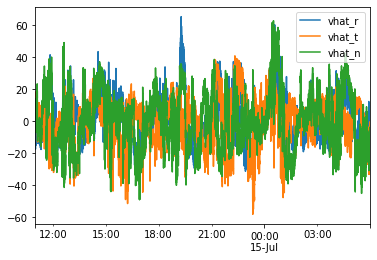

In [21]:
vhat = df_1s[["vr","vt","vn"]] - df_1s[["vr","vt","vn"]].rolling(3600).mean()
colmap = {n1:n2 for n1,n2 in zip(vhat.columns, 
                                 ["vhat_r","vhat_t","vhat_n"])}
vhat = vhat.rename(columns=colmap)
df_1s = df_1s.merge(vhat, right_index=True, left_index=True)
df_1s = df_1s.dropna()

df_1s[["vhat_r","vhat_t","vhat_n"]].plot()

<AxesSubplot:>

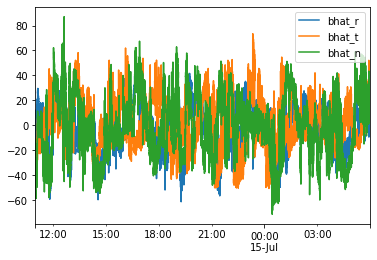

In [22]:
bhat = b - b.rolling(3600).mean()
colmap = {n1:n2 for n1,n2 in zip(bhat.columns, 
                                 ["bhat_r","bhat_t","bhat_n"])}
bhat = bhat.rename(columns=colmap)
df_1s = df_1s.merge(bhat, right_index=True, left_index=True)
df_1s = df_1s.dropna()

df_1s[["bhat_r","bhat_t","bhat_n"]].plot()

(1594756800.0, 1594792800.0)

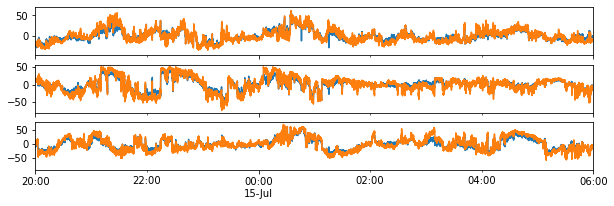

In [23]:
fig, ax = plt.subplots(3,1,sharex=True, figsize=(10,3))
for i in range(3):
    vhat.iloc[:,i].plot(ax=ax[i], label="v")
    (-bhat).iloc[:,i].plot(ax=ax[i], label="b")
t0 = datetime(2020,7,14,20)
plt.xlim([t0, t0+timedelta(hours=10)])

(1594756800.0, 1594792800.0)

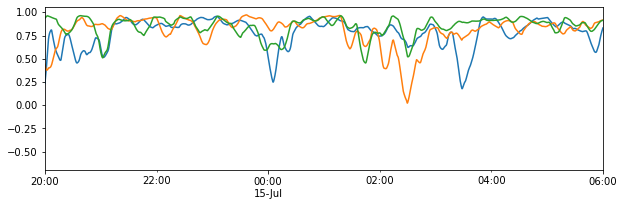

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,3),sharex=True)
for i in range(3):
    #(-bhat).iloc[:,i].rolling(600).corr(v_rtn_1s.iloc[:,i]).rolling(600).mean().plot(ax=ax)
    (-bhat).iloc[:,i].rolling(600).corr(vhat.iloc[:,i]).rolling(600).mean().plot(ax=ax)
plt.xlim([t0, t0+timedelta(hours=10)])

As a complement, you can also compute the alfvénicity : $$ \sigma=\frac{ 2\hat{b}.\hat{v} }{ (\hat{b}.\hat{b} + \hat{v}.\hat{v}) } $$ and plot it :

In [ ]:
alfveniciry = sss=2*(bhat.bhat_r*vhat.vhat_r+bhat.bhat_t*vhat.vhat_t+bhat.bhat_n*vhat.vhat_n)/(bhat.bhat_r*bhat.bhat_r+bhat.bhat_t*bhat.bhat_t+bhat.bhat_n*bhat.bhat_n+vhat.vhat_r*vhat.vhat_r+vhat.vhat_t*vhat.vhat_t+vhat.vhat_n*vhat.vhat_n)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,3),sharex=True)
sss.rolling(600).mean().plot(ax=ax)
plt.xlim([t0, t0+timedelta(hours=10)])

## Fourier Transform

Some of the calculations that follow are a bit slow.

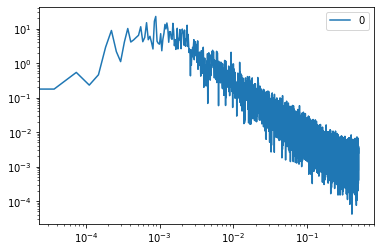

In [25]:
#from numpy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.fft import fft, fftfreq, rfft, rfftfreq

# v rtn
x = v_rtn_df - v_rtn_df.rolling(int(1200 / 4)).mean()
x = x.interpolate()
x = x.dropna()#x.fillna(0)

N = x.shape[0]

sp_v = fft(x.values, axis=0)
sp_v = np.abs(sp_v[:N//2]) * 2./N
sp_v = np.sum(sp_v**2, axis=1)

sp_v_freq = fftfreq(x.shape[0], 1.)
sp_v_freq = sp_v_freq[:N//2]

sp_v = pd.DataFrame(index=sp_v_freq, data=np.absolute(sp_v))
sp_v = sp_v.dropna()

fig, ax = plt.subplots(1,1)
sp_v.plot(ax=ax)

plt.xscale("log")
plt.yscale("log")

The data is noisy and we need to filter it. For each frequency $f$ in the domain we take the mean magnitude over $[(1 - \alpha) f, (1 + \alpha) f [$.
$\alpha$ is set to 4\%

In [26]:
def f(r, x, alpha=.04):
    fmin,fmax = (1.-alpha)*r[0], (1.+alpha)*r[0]
    indx = (x[:,0]>=fmin) & (x[:,0]<fmax)
    if np.sum(indx)==0:
        return np.nan
    return np.mean(x[indx,1])
def proportional_rolling_mean(x, alpha=.04):
    X = np.hstack((x.index.values.reshape(x.index.shape[0],1), x.values))
    Y = np.apply_along_axis(f, 1, X, X)
    return pd.DataFrame(index=X[:,0], data=Y)

Add a linear fit to the the spectrum in the proper frequency range. From Kolmogorov theory we expect a -1.6 spectral index 

Coef : -1.5250480794827352


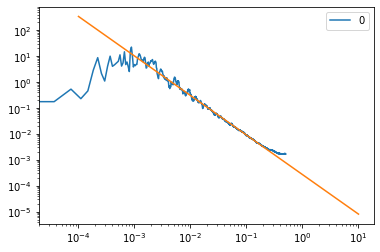

In [27]:
from sklearn.linear_model import LinearRegression
sp_v_mean = proportional_rolling_mean(sp_v)
sp_v_mean = sp_v_mean.bfill()

sp_v_mean.plot()

sp_v_mean_log = pd.DataFrame(data = 
                             np.hstack((np.log(sp_v_mean[1e-3:2e-1].index.values).reshape(sp_v_mean[1e-3:2e-1].shape[0],1),
                                        np.log(sp_v_mean[1e-3:2e-1].values))))
sp_v_mean_log = sp_v_mean_log.replace([np.inf, -np.inf], np.nan)
sp_v_mean_log = sp_v_mean_log.dropna()

# linear regression data
tt = sp_v_mean_log.values[:,0].reshape((-1,1))
xx = sp_v_mean_log.values[:,1].reshape((-1,1))

# fit the linear regression
model = LinearRegression()
model.fit(tt, xx)

print(f"Coef : {model.coef_[0,0]}")

xx = np.log(np.linspace(1e-4, 1e1, 100))
yy = xx*model.coef_[0,0]+model.intercept_[0]
plt.plot(np.exp(xx), np.exp(yy))

plt.xscale("log")
plt.yscale("log")
#plt.xlim([1e-4,1e1])
#plt.ylim([1e-4,1e8])

### Magnetic field FFT

The magnetic field data are sampled at a higher rate (8 Hz) than the velocity (.25 Hz). Let's merge both those parameters into a single dataframe `df_hr`.

In [28]:
df_hr = b_rtn_df.merge(sw_n_df, right_index=True, left_index=True, how="outer")
df_hr = df_hr.interpolate()

# resample the data to a rate of 4Hz
df_hr_8hz = df_hr.resample("125ms").ffill()

# get b
N = df_hr_8hz.shape[0]
b_ = (df_hr_8hz[["br","bt","bn"]].values / 
             (np.sqrt(mu_0*m_p*1e6*df_hr_8hz["density"].values.reshape(N,1)))*1e-12)
colnames = ["b_r","b_t","b_n"]
b_ = pd.DataFrame(data = b_, columns=colnames,index=df_hr_8hz.index)
bhat_ = b_ - b_.rolling(1200*8).mean()
colnames={n1:n2 for n1,n2 in zip(bhat_.columns, ["bhat_r","bhat_t","bhat_n"])}
bhat_=bhat_.rename(columns=colnames)

df_hr_8hz = df_hr_8hz.merge(b_, right_index=True, left_index=True)
df_hr_8hz = df_hr_8hz.merge(bhat_, right_index=True, left_index=True)
df_hr_8hz.describe()


,br,bt,bn,density,b_r,b_t,b_n,bhat_r,bhat_t,bhat_n
count,575999.000000,575999.000000,575999.000000,575972.000000,575972.000000,575972.000000,575972.000000,566373.000000,566373.000000,566373.000000
mean,4.436758,-3.022159,0.313614,16.235375,24.436124,-16.305089,2.819567,-0.086668,-0.041386,-0.322127
std,3.676389,4.013099,5.414086,2.412064,19.744180,21.552056,28.857590,13.870074,15.108775,20.535988
min,-7.779760,-12.940800,-13.529300,5.053780,-40.092486,-64.840237,-67.248520,-65.887066,-72.876863,-88.599378
25%,1.998235,-5.914855,-4.331100,14.491458,10.941085,-32.676157,-22.728196,-7.706617,-8.761886,-13.433850
50%,4.978340,-3.851030,1.152880,16.111282,27.989740,-21.069374,6.384189,0.583092,-0.534671,-0.450723
75%,7.296610,-0.396739,4.847985,17.776641,40.175247,-2.161627,27.545962,7.786441,9.109243,11.819390
max,12.380900,9.837870,12.080400,30.799118,69.420943,54.575608,86.514092,54.884722,72.324281,87.932571


Compute $b$ FFT.

In [29]:
df_hr_8hz = df_hr_8hz.fillna(0)

In [30]:
# b rtn
x = df_hr_8hz[["bhat_r","bhat_t","bhat_n"]]

sp_b = fft(x.values, axis=0)
sp_b = sp_b[:N//2] * 2./N
sp_b = np.sum(sp_b**2, axis=1)

sp_b_freq = rfftfreq(x.shape[0], .125)
sp_b_freq = sp_b_freq[:N//2]

sp_b = pd.DataFrame(index=sp_b_freq, data=np.absolute(sp_b))

(0.0001, 10.0)

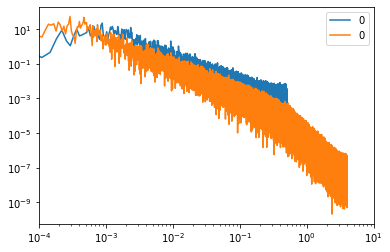

In [31]:
fig, ax = plt.subplots(1,1)
sp_v.plot(ax=ax)
sp_b.plot(ax=ax)
plt.xscale("log")
plt.yscale("log")
plt.xlim([1e-4,1e1])
#plt.ylim([1e-4,1e8])

Compute rolling mean.
Warning: This cell can take a couple minutes to execute.

In [32]:
sp_v_rm = proportional_rolling_mean(sp_v)
sp_b_rm = proportional_rolling_mean(sp_b)

Do a linear regression on the magnetic field spectrum for frequencies in $[10^{-3}, 2 \times 10^{-1}]$ and $[2 \times 10^{-1}, 10^1]$.

D:\Users\VGenot\AppData\Local\Temp\ipykernel_10532\1550647204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_b_rm_log["f"] = np.log(sp_b_rm_log.index)
D:\Users\VGenot\AppData\Local\Temp\ipykernel_10532\1550647204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_b_rm_log["sp"] = np.log(sp_b_rm[1e-3:2e-1].values)
D:\Users\VGenot\AppData\Local\Temp\ipykernel_10532\1550647204.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

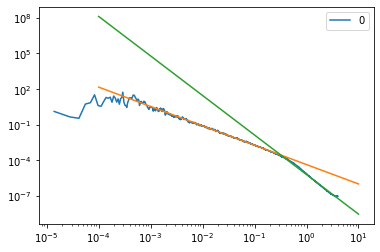

In [33]:
sp_b_rm_log = sp_b_rm[1e-3:2e-1]
sp_b_rm_log["f"] = np.log(sp_b_rm_log.index)
sp_b_rm_log["sp"] = np.log(sp_b_rm[1e-3:2e-1].values)

sp_b_rm_log = sp_b_rm_log.replace([np.inf, -np.inf], np.nan)
sp_b_rm_log = sp_b_rm_log.dropna()


sp_b_rm_log_2 = sp_b_rm[2e-1:]
sp_b_rm_log_2["f"] = np.log(sp_b_rm_log_2.index)
sp_b_rm_log_2["sp"] = np.log(sp_b_rm[2e-1:].values)

sp_b_rm_log_2 = sp_b_rm_log_2.replace([np.inf, -np.inf], np.nan)
sp_b_rm_log_2 = sp_b_rm_log_2.dropna()

# fit the linear regressions
model1 = LinearRegression()
model1.fit(sp_b_rm_log.values[:,1].reshape((-1,1)), 
           sp_b_rm_log.values[:,2].reshape((-1,1)))

model2 = LinearRegression()
model2.fit(sp_b_rm_log_2.values[:,1].reshape((-1,1)), 
           sp_b_rm_log_2.values[:,2].reshape((-1,1)))

xx = np.log(np.linspace(1e-4, 1e1, 100))
yy = xx*model1.coef_[0,0]+model1.intercept_[0]
yy2 = xx*model2.coef_[0,0]+model2.intercept_[0]

sp_b_rm.plot()
plt.plot(np.exp(xx), np.exp(yy))
plt.plot(np.exp(xx), np.exp(yy2))



plt.xscale("log")
plt.yscale("log")

In [34]:
print(model1.coef_[0,0],model2.coef_[0,0])

-1.6329026569204954 -3.3339763776794547


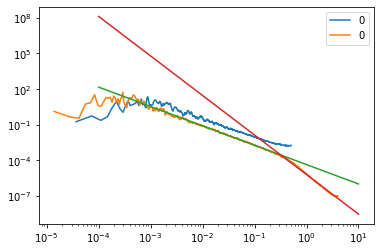

In [35]:
fig, ax = plt.subplots(1,1)
sp_v_rm.plot(ax=ax)
sp_b_rm.plot(ax=ax)
# linear interpolations
plt.plot(np.exp(xx), np.exp(yy))
plt.plot(np.exp(xx), np.exp(yy2))

plt.xscale("log")
plt.yscale("log")
plt.legend()

## Distribution in b-V space

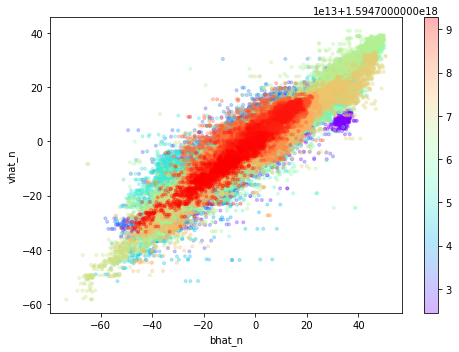

In [45]:
import matplotlib
cmap = matplotlib.cm.rainbow.copy()
cmap.set_bad('White',0.)


fig, ax = plt.subplots(1,1, figsize=(7,5))
coord = "rtn"

cs=ax.scatter(-df_1s["bhat_t"], df_1s["vhat_t"], 
              c=df_1s.index, cmap=cmap, marker=".", alpha=.3)
ax.set_xlabel(f"bhat_{coord[i]}")
ax.set_ylabel(f"vhat_{coord[i]}")
plt.colorbar(cs,ax=ax)
plt.tight_layout()
plt.show()

NameError: name 'cmap' is not defined

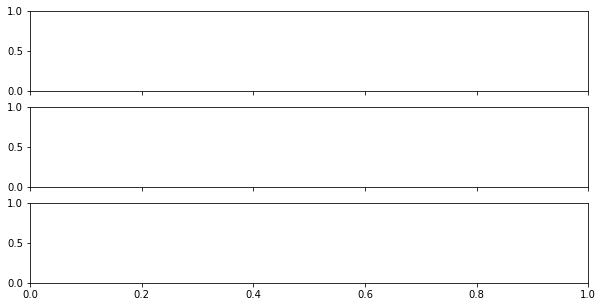

NameError: name 't_start' is not defined

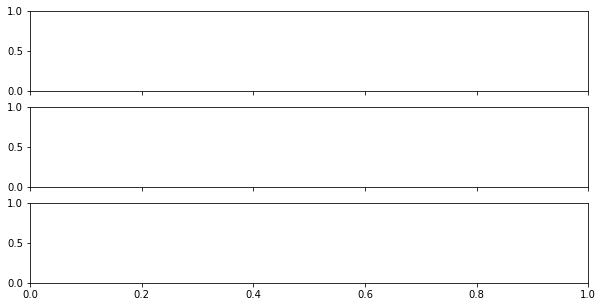

NameError: name 'cmap' is not defined

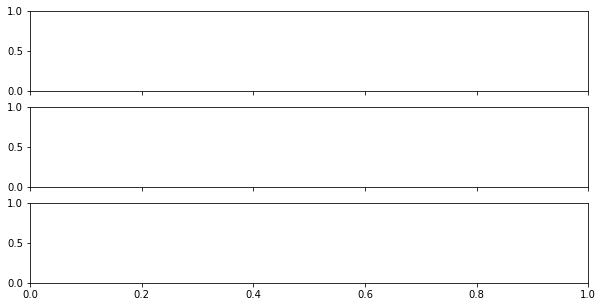